<a href="https://colab.research.google.com/github/mauroES/DataScience/blob/master/Desafio_Titanic_InstaCart_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio Titanic / Instacart**


---

**Descrição**

---


Este desafio propõe o uso dos datasets Titanic / Instacart a realização das tarefas que são descritas a seguir.




Tarefas

* Implementação do algoritmo de ordenação BubbleSort;
* Questões abertas sobre Ciência de dados / Engenahria de dados;
* Analise exploratória nos datasets Titanic e Instacart;
* Algortimo para predição de sobreviventes no dataset Titanic. 
---

**Recomendações**

---


`1. Acesso aos Dados`

* Titanic   - https://www.kaggle.com/c/titanic/data
* Instacart - https://www.kaggle.com/c/instacart-market-basket-analysis/data

`2. Linguagens para maninulação dos dados`
  * Python
  * R

`2. Para visualizações extras`
* Power BI / Tableu








# **Importação / Instalação bibliotecas**

In [ ]:
#!pip install scikit-plot

In [ ]:
#Importações
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Preparação
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#resultados
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import KFold, cross_val_score
import scikitplot as skplt

In [ ]:
df_order_products_train = pd.read_csv("order_products__train.csv",sep=",")
df_products = pd.read_csv("products.csv",sep=",")

dfTitanic = pd.read_csv("train.csv")

# **Questões abertas sobre Ciência de dados / Engenahria de dados**

In [ ]:
lista = [5,9,54,12,7,6,1]

def ordeBubble(lista):
  index =len(lista)-1
  sorted = False
  while not sorted:
    sorted = True
    for i in range(0,index):
      if lista[i]>lista[i+1]:
        sorted = False
        lista[i],lista[i+1] = lista[i+1],lista[i]
  return lista
print("A lista ordenada:",ordeBubble(lista))

**Qual a diferença entre aprendizagem supervisionada e não superviosionada?**

`R: Aprendizado supervisionado: Os modelos tentam aprender (treinando) com um conjunto de dados de entrada, em seguida reconhece e categoriza corretamente padrões baseados em uma nova entrada. 
Aprendizagem não supervisionada: Os modelos não recebem rótulos na entrada, apenas o conjunto de dados, de forma que venha a identificar qualquer estrutura de padrão dentro dela. `

**O que você entende por validação cruzada?**

`R: Técnica comumente usada para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados. Um modelo deve ser avaliado em amostras que não foram usadas para construí-lo ou ajusta-lo, de modo que forneçam um senso imparcial de eficácia.  A validação pode ser usada para comparar os desempenhos de diferentes procedimentos de modelagem preditiva`

**O que é uma regressão linear?**

`R:O algoritmo de Regressão linear tem como objetivo explorar o relacionamento existente entre duas ou mais variáveis. Para isso, utiliza os pontos de dados para encontrar a melhor linha de ajuste para modelar essa relação.`

**O que são outliers? Apresente, ao meno uma forma de lidar.**

`R: Os outliers são dados que se diferenciam extremadamente de todos os outros (são pontos fora da curva normal) e quando um modelo se depara com esse tipo de situação pode causar anomalias nos resultados obtidos.
Excluir valor: Caso o dataset seja amplo o suficiente é possível simplesmente excluir o valor anômalo sem causar grandes prejuízos à análise de dados.
Tratar separadamente: Se a quantidade de outliers for relativamente grande, uma opção é realizar uma análise separada somente com esses dados. É possível separá-los em dois grupos e criar modelos específicos para analisá-los.
Métodos de clusterização: Esses algoritmos encontram o comportamento das observações mais próximas ao outliers e fazem uma interferência de qual seria o melhor valor aproximado (por exemplo a média).`

**Descreva o que é uma "ETL"**

`R: O processo de ETL (extrair, transformar e carregar) é uma forma que as organizações combinam (extraindo e tratando) os dados de vários sistemas em um único banco de dados, repositório de dados ou data lake.`

**Explique as diferenças entre um banco de dados relacional e um não relaciona. Descreva exemplos de uso real.**

`R: 
Banco relacional: São modelos baseados no relacionamento dos dados, onde armazenam e fornecem acessos a pontos de dados que estão relacionados entre si.
Banco de dados não relacional: é qualquer banco de dados que não segue o modelo relacional de um SGBDR. Existem alguns tipos de banco de dados não relacionais como um documentos objetos JSON. 
Ex1: Duas tabelas de bancos dados mapeadas e relacionadas entre si.
Ex2: Arquivo Json que armazena os dados da covid19.`


**O que você entende por BoxPlot?**

`R: Boxplot é uma forma de visualização comumente usada na análise de dados. Ao analisar um boxplot é possível ter as interpretações dos dados como: centro dos dados (a média ou mediana), a amplitude dos dados (máximo - mínimo), a simetria ou assimetria do conjunto de dados e a presença de outliers.`

**O que você consegue explicar da seguinte figura?**

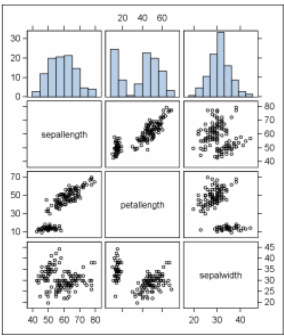

`R: Na primeira linha tem três histogramas exibindo a frequência de dados de uma variável. Na parte de baixo temos um gráfico de dispersão que aparentemente mostra a relação entre todas as variáveis do dataset.`

# **Analise exploratória nos dados App Instacart**

* **Descrição App Instacart**


> Instacart, um aplicativo de pedido e entrega de supermercado, Atualmente,  usam dados transacionais para desenvolver modelos que preveem quais produtos um usuário comprará novamente, tentará pela primeira vez ou adicionará ao carrinho durante uma sessão.

* **Dicionario** - https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b


In [ ]:
dfInstaCart = pd.merge(df_order_products_train, df_products, on='product_id', how='left')
vNulos = dfInstaCart.fillna(value=0).count()
vNulos

In [ ]:
# Os 10 produtos mais vendidos
top10MaisVendido = dfInstaCart[['product_id','product_name']].value_counts().reset_index().head(10)
top10MaisVendido.columns = ['Codigo','Produto', 'Total']
top10MaisVendido

In [ ]:
# Média de produto por pedido
# fórmula de cálculo: (Total de itens vendidos) dividido por (Total de vendas/tickets)
agrupado = dfInstaCart[['product_id','order_id']].groupby('order_id').count().reset_index()
totalPedido  = agrupado['order_id'].count()
totalProduto = agrupado['product_id'].sum()
media = totalProduto / totalPedido
print("\nTotal Pedido : {}".format(totalPedido))
print("Total Produto : {}".format(totalProduto))
print("Quantidade média de produto por pedido : {0:0.0f}".format(media))

In [ ]:
''' Os 10 produtos mais vendidos em SQL, considerando as seguintes tabelas:
        products = product_id, product_name, aisle_id, department_id 
        order_products = order_id, product_id, add_to_cart_order, reordered
'''
#select o.product_id,p.product_name,count(o.product_id) as Total 
#from  order_products o,
#      products p
#where o.product_id  = p.product_id
#group by product_id  ORDER BY total DESC LIMIT 10;

# **Analise exploratória nos datasets Titanic**




In [ ]:
dfTitanic.head()

In [ ]:
dfTitanic.isnull().sum()

In [ ]:
sns.countplot('Survived', data= dfTitanic)
plt.show()

In [ ]:
# histograma não sobrevivente
plt.title('O histograma das faixas etárias das pessoas que não sobreviveram')
plt.hist(dfTitanic.loc[dfTitanic.Survived == 0, 'Age'], np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

In [ ]:
# histograma sobrevivente
plt.title('O histograma das faixas etárias das pessoas que não sobreviveram')
plt.hist(dfTitanic.loc[dfTitanic.Survived == 1, 'Age'], np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

In [ ]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data = dfTitanic['Age'])
sns.despine(offset=10, trim=True)

In [ ]:
sns.countplot(x = dfTitanic['Sex']);

In [ ]:
plt.hist(x = dfTitanic['Age']);

# **Algortimo para predição de sobreviventes do Titanic**

In [ ]:
# lendo o dataset e verificando como esta a distribuição da variavel alvo
print(dfTitanic.Survived.value_counts())
print("\nOs sobreviventes :{:.4f} % do dataset.\n".format((dfTitanic[dfTitanic.Survived == 1].shape[0] / dfTitanic.shape[0]) * 100))
sns.countplot('Survived', data = dfTitanic);

In [ ]:
dfTitanic = dfTitanic[['Survived','Pclass','Sex','Age']] # Pegando apenas as variaveis desejadas
dfTitanic['Age']= dfTitanic['Age'].fillna(dfTitanic['Age'].median())# nulos pela media
label_encoder_Sex = LabelEncoder()
teste = label_encoder_Sex.fit_transform(dfTitanic['Sex'])
dfTitanic['Sex'] = label_encoder_Sex.fit_transform(dfTitanic['Sex'] ) # convertendo a variavel sexo
dfTitanic.head()

In [ ]:
# criando a divisão da base
previsores = dfTitanic.iloc[:, 1:4].values 
classe = dfTitanic.iloc[:, 0].values

# Normalizando previsores
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores) 

# executando algoritmo de arvore de decisão de forma individual
X_titanic_treinamento,X_titanic_teste,y_titanic_treinamento,y_titanic_teste =  train_test_split(previsores,classe,test_size=0.25,random_state=0)
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arvore.fit(X_titanic_treinamento, y_titanic_treinamento)
previsoes = arvore.predict(X_titanic_teste)

#visualizando as metricas
print('\n',classification_report(y_titanic_teste, previsoes))
print(skplt.metrics.plot_confusion_matrix(y_titanic_teste, previsoes))

In [ ]:
''' Usando validação cruzada e mais modelos de previsão'''

result_arvore = []
result_random_forest = [] 
result_knn = []
result_logistica = []

for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state= i)

  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  scores = cross_val_score(arvore,previsores, classe, cv = kfold)
  result_arvore.append(scores.mean())
  
  random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split=5, n_estimators = 10)
  scores = cross_val_score(random_forest,previsores, classe, cv = kfold)
  result_random_forest.append(scores.mean())

  knn = KNeighborsClassifier()
  scores = cross_val_score(knn,previsores, classe, cv = kfold)
  result_knn.append(scores.mean())

  logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(logistica,previsores, classe, cv = kfold)
  result_logistica.append(scores.mean())

resultFinal = pd.DataFrame({'Arvore': result_arvore, 'Random forest': result_random_forest,
                           'KNN': result_knn, 'Logistica': result_logistica})
res = resultFinal.mean().head()
res.sort_values(ascending=False)